<a href="https://colab.research.google.com/github/Anupam-2105/ML-Projects/blob/main/Copy_of_Diamond_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

In [ ]:
url = 'https://raw.githubusercontent.com/Anupam-2105/ML-Projects/main/diamonds.csv'
diamond_data = pd.read_csv(url)

In [ ]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
diamond_data.shape

(53940, 10)

In [ ]:
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond_data.duplicated().sum()
# Return sum of total duplicate rows in the dataframe

146

In [ ]:
diamond_data.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamond_data.shape

(53940, 10)

In [ ]:
diamond_data.isnull().sum()
#isnull().sum() returns the number of missing values in the data set.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond_data.nunique()
#DataFrame.nunique(axis=0, dropna=True)
#Count number of distinct elements in specified axis.
#axis is default 0 (for rows)

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [ ]:
diamond_data['cut'].unique()
#The unique() function is used to get unique values of Series object

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
diamond_data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

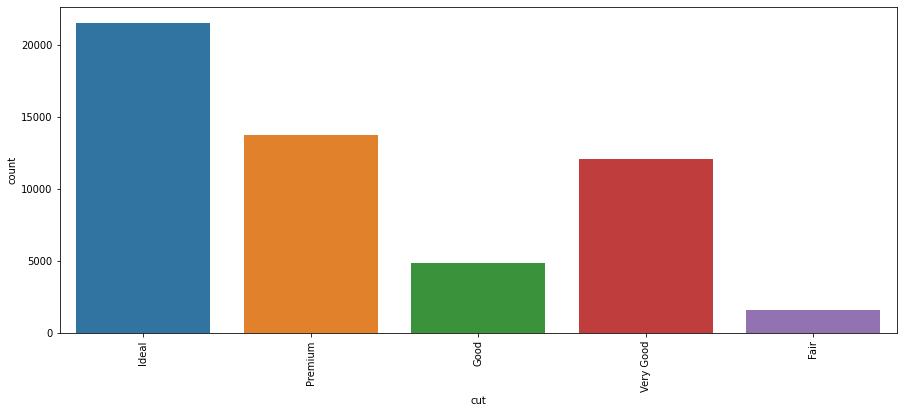

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(diamond_data['cut'], data=diamond_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig1 = px.histogram(diamond_data, x = 'cut', color = 'cut')
fig1.show()

In [ ]:
diamond_data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
diamond_data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

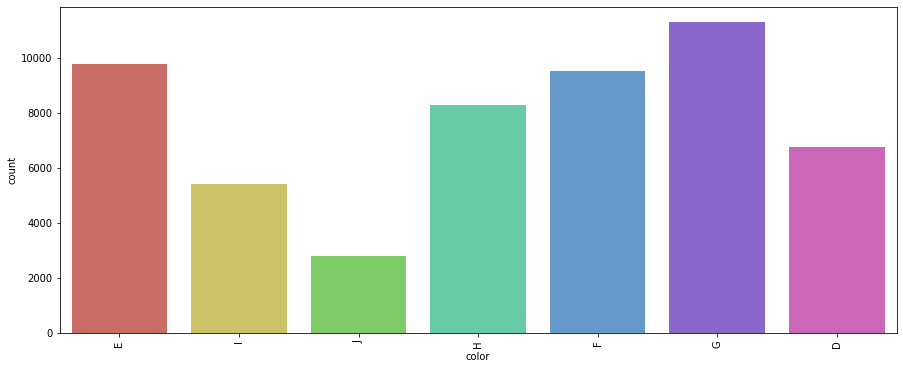

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(diamond_data['color'],data=diamond_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig2 = px.histogram(diamond_data, x = 'color', color = 'color')
fig2.show()

In [ ]:
diamond_data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
diamond_data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

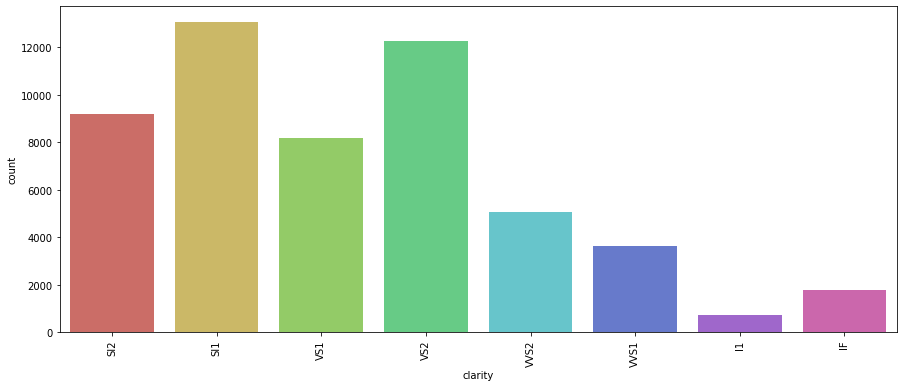

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(diamond_data['clarity'],data=diamond_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig3 = px.histogram(diamond_data, x = 'clarity', color = 'clarity')
fig3.show()

In [ ]:
diamond_data = diamond_data.drop(diamond_data[diamond_data["x"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["y"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["z"]==0].index)

In [ ]:
diamond_data.shape

(53920, 10)

<function matplotlib.pyplot.show>

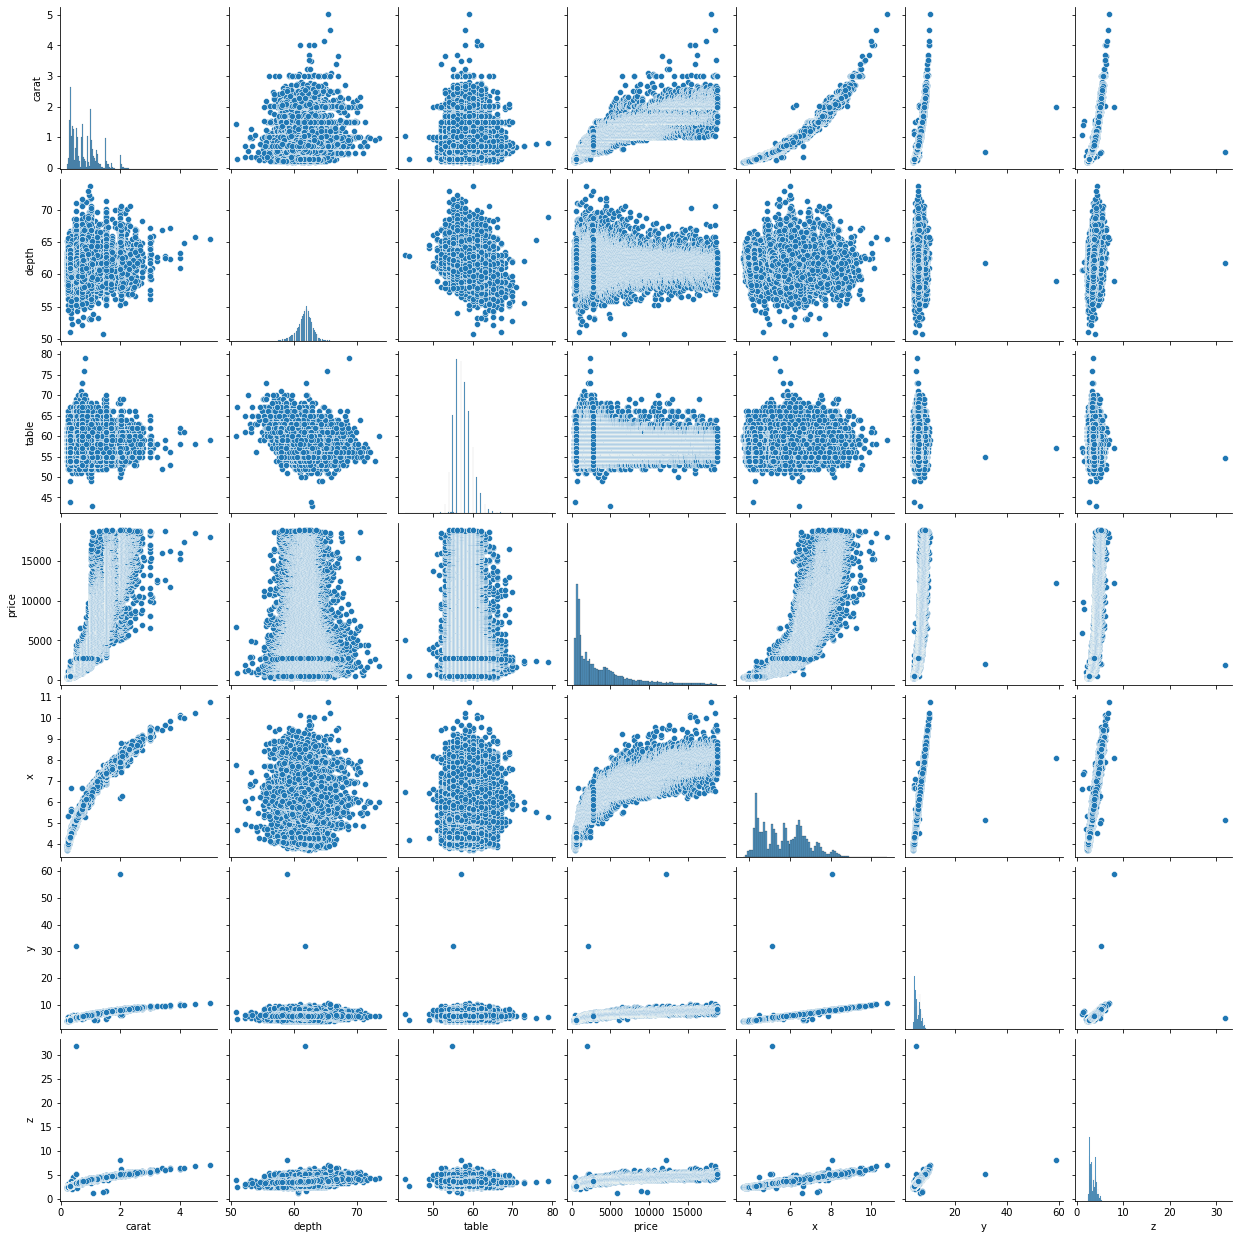

In [ ]:
sns.pairplot(diamond_data)
plt.show

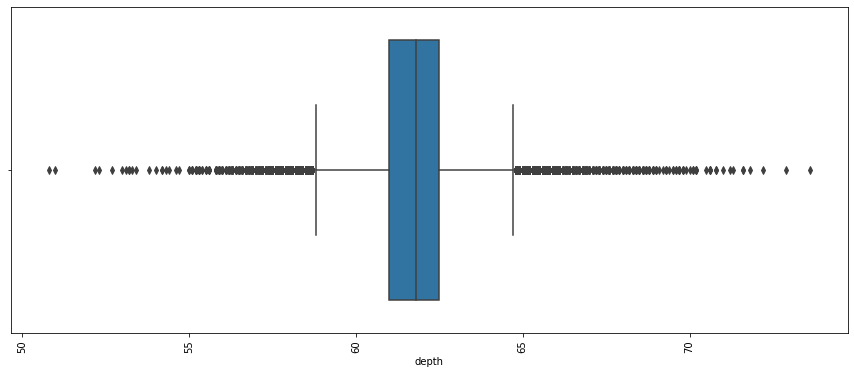

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['depth'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
diamond_depth = diamond_data['depth']
Q3 = diamond_depth.quantile(0.75)
Q1 = diamond_depth.quantile(0.45)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
depth_outliers = diamond_depth[(diamond_depth <lower_limit) | (diamond_depth >upper_limit)]
depth_outliers

1        59.8
2        56.9
8        65.1
9        59.4
10       64.0
         ... 
53918    59.3
53927    58.1
53930    60.5
53931    59.8
53932    60.5
Name: depth, Length: 11951, dtype: float64

In [ ]:
diamond_data=diamond_data[(diamond_data["depth"]<75) & (diamond_data["depth"]>45)]

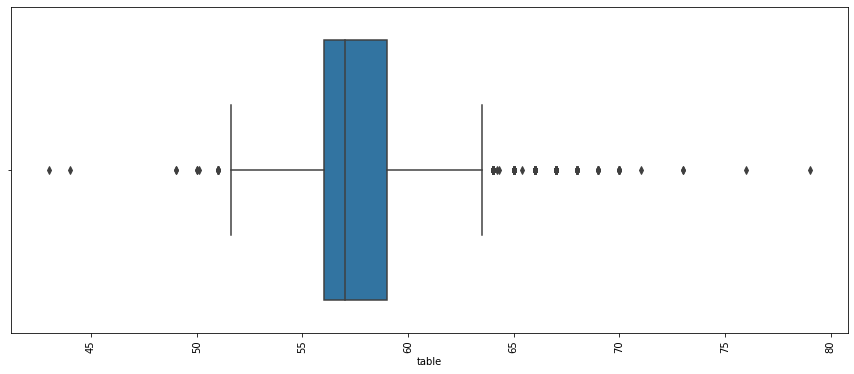

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(diamond_data['table'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
diamond_data = diamond_data[(diamond_data["table"]<80)&(diamond_data["table"]>40)]